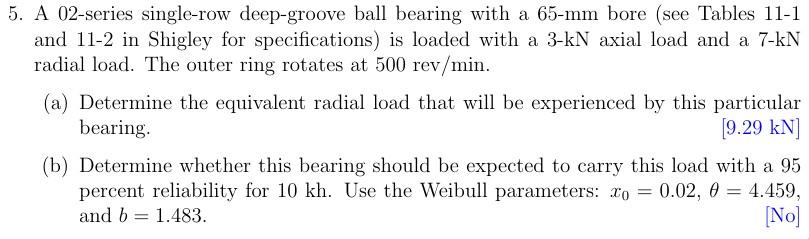

From Table 11-2 in Shigley, we note that a 02-series single-row deep-groove ball bearing with a 65-mm bore has $C_{10} = 55.9$ kN and $C_0 = 34.0$ kN


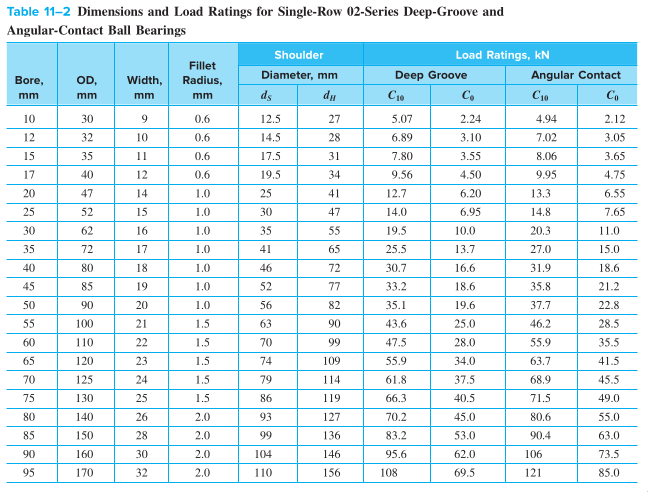


We first need to determine the value of $\frac{F_a}{V F_r}$ and compare it with the value of $e$. 

In [2]:
F_a = 3
F_r = 7
V = 1.2  #Since it is the outer ring that rotates

F_a/(V*F_r)

0.35714285714285715

We need to compare the above value with $e$

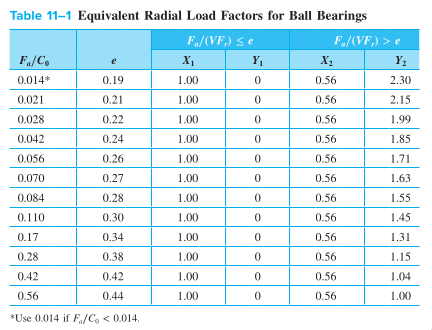

So, we need to evaluate $\frac{F_a}{C_0}$. 

In [3]:
C0 = 34

F_a/C0

0.08823529411764706

From Table 11-1, we note that $e$ should be lying between 0.28 and 0.30. 

Therefore, we have: $\frac{F_a}{V F_r} > e$. 

Therefore the appropriate formula for the equivalent radial load is:
\begin{gather*}
F_e = X_2 V F_r + Y_2 F_a
\end{gather*}

where from Table 11-1, $X_2 = 0.56$ and $Y_2$ has to be determined from interpolation.

\begin{gather*}
\frac{Y_2 - 1.55}{1.45 - 1.55} = \frac{0.088 - 0.084}{0.110 - 0.084} \\
\implies Y_2 = 1.55 + (1.45 - 1.55)\frac{0.088 - 0.084}{0.110 - 0.084}
\end{gather*}

In [5]:
Y2 = 1.55 + (1.45 - 1.55)*(0.088-0.084)/(0.110-0.084)
display(Y2)

1.5346153846153847

In [7]:
X2 = 0.56
Y2 = 1.53 #approx
F_e = X2*V*F_r + Y2*F_a
display(F_e)

9.294

Next, we need to determine if this $F_e$ can be carried by the bearing for 10 kh at 500 rev/min with a 95 percent reliability. To test this we need to determine the $C_{10}$ value required and then compare with the actual $C_{10}$ that was read from Table 11-2 above. 

\begin{gather*}
    C_{10} = F_D \left[ \frac{x_D}{x_0 + (\theta - x_0)[\ln(1/R_D) ]^{1/b}}  \right]^{1/a}
\end{gather*}

For the $x_D$ value, we need to find $L_D$ first. 

In [10]:
from math import log

In [12]:
L_D = 10000*500*60
L_10 = 1e6
x_D = L_D/L_10
R_D = 0.95

x_0 = 0.02
theta = 4.459
b = 1.483

F_D = F_e

a = 3 # for ball bearing


C_10_required = F_D*( x_D/(x_0 + (theta-x_0)*(log(1/R_D))**(1/b)) )**(1/a)
display(C_10_required)

73.00171236846121

The required $C_{10}$ value is 73 kN while the $C_{10}$ that was read from Table 11-2 was 55.9 kN. 

Therefore, the ball bearing will not be able to carry the load as specified. 